## Importing the data

In [ ]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the data into a pandas dataframe and assigning the date column as the index for the df
weather = pd.read_csv('weather_data.csv', index_col='DATE')

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,MDPR,PGTM,PRCP,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1948-07-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1948-07-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1948-07-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1948-07-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-07-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## Data pre processing

### 1. Missing values

In [4]:
# checking for missing values
weather.isnull().sum()

STATION        0
NAME           0
ACMH       15664
ACSH       15663
AWND       12954
DAPR       27009
FMTM       16981
MDPR       27009
PGTM       14837
PRCP        2890
SNOW        3172
SNWD        3172
TAVG       20961
TMAX           2
TMIN           2
TSUN       27074
WDF1       15669
WDF2       17456
WDF5       17539
WDFG       21984
WDFM       27104
WESD       21034
WSF1       15666
WSF2       17456
WSF5       17540
WSFG       19642
WSFM       27103
WT01       19022
WT02       25714
WT03       25674
WT04       26714
WT05       26731
WT06       26897
WT07       26993
WT08       21557
WT09       26925
WT11       27091
WT13       24920
WT14       26218
WT15       27063
WT16       19316
WT17       27045
WT18       25678
WT21       27100
WT22       27056
WV01       27104
dtype: int64

In [5]:
# converting the number of missing values in each column into percentage
weather.isnull().sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.577901
ACSH       0.577864
AWND       0.477919
DAPR       0.996458
FMTM       0.626490
MDPR       0.996458
PGTM       0.547390
PRCP       0.106622
SNOW       0.117026
SNWD       0.117026
TAVG       0.773326
TMAX       0.000074
TMIN       0.000074
TSUN       0.998856
WDF1       0.578085
WDF2       0.644014
WDF5       0.647076
WDFG       0.811068
WDFM       0.999963
WESD       0.776019
WSF1       0.577975
WSF2       0.644014
WSF5       0.647113
WSFG       0.724663
WSFM       0.999926
WT01       0.701789
WT02       0.948681
WT03       0.947205
WT04       0.985575
WT05       0.986202
WT06       0.992326
WT07       0.995868
WT08       0.795315
WT09       0.993359
WT11       0.999483
WT13       0.919388
WT14       0.967275
WT15       0.998450
WT16       0.712636
WT17       0.997786
WT18       0.947353
WT21       0.999816
WT22       0.998192
WV01       0.999963
dtype: float64

In [6]:
# creating a copy of weather dataframe with only core columns
core_weather = weather[['PRCP','SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [7]:
# renaming the columns 
core_weather.rename(columns = {'PRCP':'precip', 
                               'SNOW':'snow', 
                               'SNWD':'snow_depth', 
                               'TMAX':'temp_max', 
                               'TMIN':'temp_min'}, inplace=True)

In [8]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1948-07-17,0.06,0.0,0.0,74.0,64.0
1948-07-18,0.00,0.0,0.0,81.0,70.0
1948-07-19,0.00,0.0,0.0,85.0,70.0
1948-07-20,0.00,0.0,0.0,84.0,69.0
1948-07-21,2.45,0.0,0.0,85.0,71.0
...,...,...,...,...,...
2022-09-27,0.00,0.0,0.0,72.0,60.0
2022-09-28,0.00,0.0,0.0,73.0,54.0
2022-09-29,0.00,0.0,0.0,68.0,56.0


In [9]:
# checking for missing values 
core_weather.isnull().sum()/core_weather.shape[0]

precip        0.106622
snow          0.117026
snow_depth    0.117026
temp_max      0.000074
temp_min      0.000074
dtype: float64

In [10]:
core_weather['snow'].value_counts()

0.0     23031
0.1       107
0.2        80
0.3        76
0.4        47
        ...  
10.4        1
14.1        1
13.0        1
11.0        1
11.9        1
Name: snow, Length: 99, dtype: int64

In [11]:
core_weather['precip'].value_counts()

0.00    16342
0.01      697
0.02      539
0.03      372
0.04      314
        ...  
6.27        1
2.15        1
3.39        1
2.04        1
3.24        1
Name: precip, Length: 279, dtype: int64

In [12]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1950-06-01,NaN,NaN,NaN,65.0,57.0
1950-06-02,NaN,NaN,NaN,85.0,53.0
1950-06-03,NaN,NaN,NaN,77.0,60.0
1950-06-04,NaN,NaN,NaN,74.0,53.0
1950-06-05,NaN,NaN,NaN,71.0,52.0
...,...,...,...,...,...
1958-12-29,NaN,NaN,NaN,39.0,35.0
1958-12-30,NaN,NaN,NaN,48.0,31.0
1959-12-01,NaN,NaN,0.0,NaN,NaN


In [13]:
core_weather.loc['1950-06-01':'1950-06-31']

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1950-06-01,NaN,NaN,NaN,65.0,57.0
1950-06-02,NaN,NaN,NaN,85.0,53.0
1950-06-03,NaN,NaN,NaN,77.0,60.0
1950-06-04,NaN,NaN,NaN,74.0,53.0
1950-06-05,NaN,NaN,NaN,71.0,52.0
1950-06-06,NaN,NaN,NaN,75.0,58.0
1950-06-07,NaN,NaN,NaN,87.0,63.0
1950-06-08,NaN,NaN,NaN,85.0,65.0
1950-06-09,NaN,NaN,NaN,73.0,63.0


In [14]:
core_weather['precip'].value_counts()

0.00    16342
0.01      697
0.02      539
0.03      372
0.04      314
        ...  
6.27        1
2.15        1
3.39        1
2.04        1
3.24        1
Name: precip, Length: 279, dtype: int64

In [15]:
# replacing null values with 0.00
core_weather['precip'] = core_weather['precip'].fillna(0)

In [16]:
core_weather['snow'] = core_weather['snow'].fillna(0)
core_weather['snow_depth'] = core_weather['snow_depth'].fillna(0)

In [17]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1959-12-01,0.0,0.0,0.0,NaN,NaN
1960-05-01,0.0,0.0,0.0,NaN,NaN


In [18]:
core_weather[pd.isnull(core_weather['temp_min'])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1959-12-01,0.0,0.0,0.0,NaN,NaN
1960-05-01,0.0,0.0,0.0,NaN,NaN


In [19]:
# forward filling the null values
core_weather = core_weather.fillna(method = 'ffill')

In [20]:
core_weather.isnull().sum()/core_weather.shape[0]

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [21]:
# checking to see if any columns have 9999 as an entry
core_weather.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

### 2. Verifying data types

In [22]:
core_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [23]:
core_weather.index

Index(['1948-07-17', '1948-07-18', '1948-07-19', '1948-07-20', '1948-07-21',
       '1948-07-22', '1948-07-23', '1948-07-24', '1948-07-25', '1948-07-26',
       ...
       '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26',
       '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01'],
      dtype='object', name='DATE', length=27105)

In [24]:
# converting the index to a date time index
core_weather.index = pd.to_datetime(core_weather.index)

In [25]:
core_weather.index

DatetimeIndex(['1948-07-17', '1948-07-18', '1948-07-19', '1948-07-20',
               '1948-07-21', '1948-07-22', '1948-07-23', '1948-07-24',
               '1948-07-25', '1948-07-26',
               ...
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01'],
              dtype='datetime64[ns]', name='DATE', length=27105, freq=None)

### 3. Analyzing the data

<AxesSubplot:xlabel='DATE'>

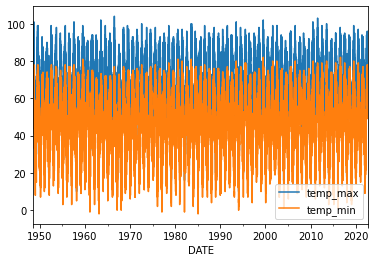

In [26]:
core_weather[['temp_max', 'temp_min']].plot()

<AxesSubplot:xlabel='DATE'>

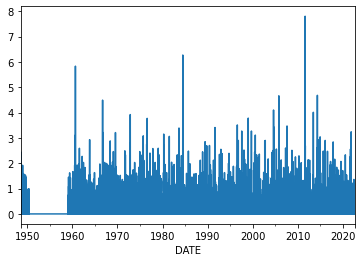

In [27]:
core_weather['precip'].plot()

In [28]:
core_weather.index.year.value_counts().sort_index()

1948    168
1949    365
1950    365
1951    365
1952    366
       ... 
2018    365
2019    365
2020    366
2021    365
2022    274
Name: DATE, Length: 75, dtype: int64

### 4. Training the model

In [29]:
# creating a new column with the next day's max temperature
core_weather['target_temp_max'] = core_weather.shift(-1)['temp_max']

In [30]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target_temp_max
DATE,,,,,,
1948-07-17,0.06,0.0,0.0,74.0,64.0,81.0
1948-07-18,0.00,0.0,0.0,81.0,70.0,85.0
1948-07-19,0.00,0.0,0.0,85.0,70.0,84.0
1948-07-20,0.00,0.0,0.0,84.0,69.0,85.0
1948-07-21,2.45,0.0,0.0,85.0,71.0,81.0
...,...,...,...,...,...,...
2022-09-27,0.00,0.0,0.0,72.0,60.0,73.0
2022-09-28,0.00,0.0,0.0,73.0,54.0,68.0
2022-09-29,0.00,0.0,0.0,68.0,56.0,64.0


In [31]:
# cutting out the last row to remove the null value
core_weather = core_weather.iloc[:-1,:].copy()

In [32]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target_temp_max
DATE,,,,,,
1948-07-17,0.06,0.0,0.0,74.0,64.0,81.0
1948-07-18,0.00,0.0,0.0,81.0,70.0,85.0
1948-07-19,0.00,0.0,0.0,85.0,70.0,84.0
1948-07-20,0.00,0.0,0.0,84.0,69.0,85.0
1948-07-21,2.45,0.0,0.0,85.0,71.0,81.0
...,...,...,...,...,...,...
2022-09-26,0.00,0.0,0.0,75.0,59.0,72.0
2022-09-27,0.00,0.0,0.0,72.0,60.0,73.0
2022-09-28,0.00,0.0,0.0,73.0,54.0,68.0


In [33]:
# importing the regresion model
from sklearn.linear_model import Ridge

In [34]:
# initialising the model 
regression = Ridge(alpha = .1)

In [35]:
# creating a predictiors variable
predictors = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [36]:
# splitting data into training and testing set
train = core_weather.loc[:'2019-12-31']
test = core_weather.loc['2020-01-01':]

In [37]:
# fitting the model to the data
regression.fit(train[predictors], train['target_temp_max'])

Ridge(alpha=0.1)

In [38]:
# generating predictions on the test data
predictions = regression.predict(test[predictors])

### 5. Evaluating the model

In [111]:
# checking how well the model performed
# importing mean absolute error and mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
mean_absolute_error(test['target_temp_max'],predictions)

5.186974206033209

In [41]:
# combining actual data and predicted data 
combine = pd.concat([test['target_temp_max'], pd.Series(predictions, index = test.index)], axis = 1)
combine.columns = ['actual', 'predictions']

In [42]:
combine

,actual,predictions
DATE,,
2020-01-01,48.0,45.833827
2020-01-02,48.0,47.211676
2020-01-03,51.0,52.476779
2020-01-04,49.0,54.361807
2020-01-05,45.0,49.655068
...,...,...
2022-09-26,72.0,73.827696
2022-09-27,73.0,72.892799
2022-09-28,68.0,70.416745


<AxesSubplot:xlabel='DATE'>

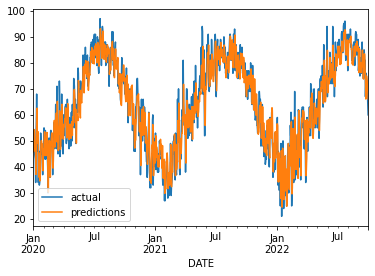

In [43]:
combine.plot()

In [44]:
# checking the coefficients of the model
regression.coef_

array([-1.12528365, -0.39864591,  0.07262749,  0.47561379,  0.49194453])

In [119]:
# creating a function for predictions
def create_predictions(predictors, core_weather, regression):
    train = core_weather.loc[:'2019-12-31']
    test = core_weather.loc['2020-01-01':]
    regression.fit(train[predictors], train['target_temp_max'])
    predictions = regression.predict(test[predictors])
    mae = mean_absolute_error(test['target_temp_max'],predictions)
    combine = pd.concat([test['target_temp_max'], pd.Series(predictions, index = test.index)], axis = 1)
    combine.columns = ['actual', 'predictions']
    return mae, combine

### 6. Improving the model

In [120]:
mae, combine = create_predictions(predictors, core_weather, regression)

In [48]:
mae

5.186974206033209

In [62]:
# creating new columns 
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()

In [63]:
core_weather['month_day_max'] = core_weather['month_max']/core_weather['temp_max']

In [64]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target_temp_max,month_max,month_day_max
DATE,,,,,,,,
1948-10-15,0.00,0.0,0.0,62.0,48.0,63.0,NaN,NaN
1948-10-16,0.00,0.0,0.0,63.0,42.0,67.0,NaN,NaN
1948-10-17,0.00,0.0,0.0,67.0,56.0,63.0,NaN,NaN
1948-10-18,0.14,0.0,0.0,63.0,38.0,50.0,NaN,NaN
1948-10-19,0.00,0.0,0.0,50.0,33.0,52.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-09-26,0.00,0.0,0.0,75.0,59.0,72.0,80.133333,1.068444
2022-09-27,0.00,0.0,0.0,72.0,60.0,73.0,79.766667,1.107870
2022-09-28,0.00,0.0,0.0,73.0,54.0,68.0,79.366667,1.087215


In [65]:
core_weather = core_weather.iloc[30:,:].copy()

In [66]:
predictors = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'month_max', 'month_day_max']

In [67]:
mae, combine = create_predictions(predictors, core_weather, regression)

In [68]:
mae

4.998567114986366

<AxesSubplot:xlabel='DATE'>

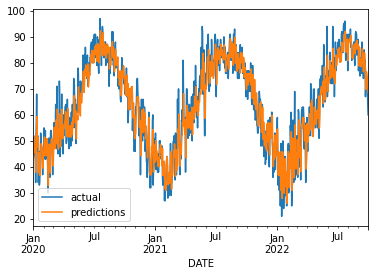

In [69]:
combine.plot()

In [73]:
# creating more columns 
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [74]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target_temp_max,month_max,month_day_max,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
1948-11-14,0.00,0.0,0.0,52.0,40.0,58.0,60.466667,1.162821,52.000000,52.000000
1948-11-15,0.00,0.0,0.0,58.0,42.0,55.0,60.300000,1.039655,55.000000,58.000000
1948-11-16,0.00,0.0,0.0,55.0,42.0,60.0,59.900000,1.089091,55.000000,55.000000
1948-11-17,0.02,0.0,0.0,60.0,45.0,62.0,59.800000,0.996667,56.250000,60.000000
1948-11-18,0.00,0.0,0.0,62.0,40.0,62.0,60.200000,0.970968,57.400000,62.000000
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0.00,0.0,0.0,75.0,59.0,72.0,80.133333,1.068444,75.472924,72.108108
2022-09-27,0.00,0.0,0.0,72.0,60.0,73.0,79.766667,1.107870,75.471358,72.594595
2022-09-28,0.00,0.0,0.0,73.0,54.0,68.0,79.366667,1.087215,75.470243,72.054054


In [75]:
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [76]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target_temp_max,month_max,month_day_max,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
1948-11-14,0.00,0.0,0.0,52.0,40.0,58.0,60.466667,1.162821,52.000000,52.000000
1948-11-15,0.00,0.0,0.0,58.0,42.0,55.0,60.300000,1.039655,55.000000,58.000000
1948-11-16,0.00,0.0,0.0,55.0,42.0,60.0,59.900000,1.089091,55.000000,55.000000
1948-11-17,0.02,0.0,0.0,60.0,45.0,62.0,59.800000,0.996667,56.250000,60.000000
1948-11-18,0.00,0.0,0.0,62.0,40.0,62.0,60.200000,0.970968,57.400000,62.000000
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0.00,0.0,0.0,75.0,59.0,72.0,80.133333,1.068444,75.472924,72.108108
2022-09-27,0.00,0.0,0.0,72.0,60.0,73.0,79.766667,1.107870,75.471358,72.594595
2022-09-28,0.00,0.0,0.0,73.0,54.0,68.0,79.366667,1.087215,75.470243,72.054054


In [77]:
predictors = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'monthly_avg', 'day_of_year_avg']

In [78]:
mae, combine = create_predictions(predictors, core_weather, regression)

In [79]:
mae

4.789142324654658

In [88]:
# checking the correlations
core_weather.corr()['target_temp_max']

precip            -0.003966
snow              -0.163487
snow_depth        -0.228193
temp_max           0.916098
temp_min           0.914236
target_temp_max    1.000000
month_max          0.872436
month_day_max     -0.333280
monthly_avg        0.890555
day_of_year_avg    0.902011
Name: target_temp_max, dtype: float64

In [89]:
core_weather['max_min'] = core_weather['temp_max']-core_weather['temp_min']

In [90]:
predictors = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'monthly_avg', 'day_of_year_avg', 'max_min']

In [91]:
mae, combine = create_predictions(predictors, core_weather, regression)

In [92]:
mae

4.789142324183441

In [93]:
core_weather.corr()['target_temp_max']

precip            -0.003966
snow              -0.163487
snow_depth        -0.228193
temp_max           0.916098
temp_min           0.914236
target_temp_max    1.000000
month_max          0.872436
month_day_max     -0.333280
monthly_avg        0.890555
day_of_year_avg    0.902011
max_min            0.201333
Name: target_temp_max, dtype: float64

In [94]:
predictors = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'month_max', 'monthly_avg', 'day_of_year_avg', 'max_min']

In [95]:
mae, combine = create_predictions(predictors, core_weather, regression)

In [96]:
mae

4.79003036705942

### 7. Using Random Forest Regressor

In [97]:
# importing train_test_split function
from sklearn.model_selection import train_test_split

In [100]:
X = core_weather.drop(columns='target_temp_max', axis=1)
Y = core_weather['target_temp_max']

In [102]:
print(X)
print(Y)

            precip  snow  snow_depth  temp_max  temp_min  month_max  \
DATE                                                                  
1948-11-14    0.00   0.0         0.0      52.0      40.0  60.466667   
1948-11-15    0.00   0.0         0.0      58.0      42.0  60.300000   
1948-11-16    0.00   0.0         0.0      55.0      42.0  59.900000   
1948-11-17    0.02   0.0         0.0      60.0      45.0  59.800000   
1948-11-18    0.00   0.0         0.0      62.0      40.0  60.200000   
...            ...   ...         ...       ...       ...        ...   
2022-09-26    0.00   0.0         0.0      75.0      59.0  80.133333   
2022-09-27    0.00   0.0         0.0      72.0      60.0  79.766667   
2022-09-28    0.00   0.0         0.0      73.0      54.0  79.366667   
2022-09-29    0.00   0.0         0.0      68.0      56.0  78.766667   
2022-09-30    0.00   0.0         0.0      64.0      54.0  77.966667   

            month_day_max  monthly_avg  day_of_year_avg  max_min  
DATE     

In [103]:
# splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(21587, 10) (5397, 10) (21587,) (5397,)


In [104]:
# importing the model 
from sklearn.ensemble import RandomForestRegressor

In [105]:
# initiation of the model 
rfr = RandomForestRegressor(n_estimators = 30, random_state = 30) 

In [107]:
# fitting the model 
weather_rfr = rfr.fit(X_train, Y_train)

In [108]:
# prediction on the training data
ytrain_pred = rfr.predict(X_train)

In [124]:
# mean absolute error of the training data
print('The mae is %.2f'% mean_absolute_error(Y_train, ytrain_pred))

The mae is 1.89


In [125]:
# mean squared error of the training data
print('The mse is %.2f'% mean_squared_error(Y_train, ytrain_pred))

The mse is 6.18


In [122]:
# prediction of the testing data
ytest_pred = rfr.predict(X_test)

In [123]:
print(ytest_pred[:10])

[67.         28.1        58.06666667 39.1        84.43333333 46.96666667
 79.2        48.73333333 78.7        37.56666667]


In [127]:
# mean absolute error of the training data
print('The mae is %.2f'% mean_absolute_error(Y_test, ytest_pred))

The mae is 4.96


In [128]:
# mean squared error of the training data
print('The mse is %.2f'% mean_squared_error(Y_test, ytest_pred))

The mse is 40.61


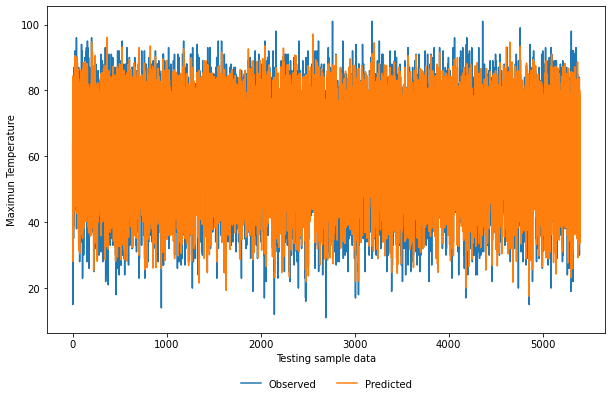

In [135]:
# plotting observed and predicted data
plt.rcParams['figure.figsize'] = (10,6)
x_axis = range(len(X_test))
plt.plot(x_axis, Y_test, label='Observed')
plt.plot(x_axis, ytest_pred, label='Predicted')
plt.ylabel('Maximun Temperature')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='lower center', ncol=2, frameon=False)
plt.show()